In [ ]:
#MACHINE LEARNING PAT 4
#NAME - VINEET SINGH
#REGISTER NUMBER - 23MCA0181

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files
files.upload()

Saving Iris.csv to Iris.csv


{'Iris.csv': b'Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n1,5.1,3.5,1.4,0.2,Iris-setosa\n2,4.9,3.0,1.4,0.2,Iris-setosa\n3,4.7,3.2,1.3,0.2,Iris-setosa\n4,4.6,3.1,1.5,0.2,Iris-setosa\n5,5.0,3.6,1.4,0.2,Iris-setosa\n6,5.4,3.9,1.7,0.4,Iris-setosa\n7,4.6,3.4,1.4,0.3,Iris-setosa\n8,5.0,3.4,1.5,0.2,Iris-setosa\n9,4.4,2.9,1.4,0.2,Iris-setosa\n10,4.9,3.1,1.5,0.1,Iris-setosa\n11,5.4,3.7,1.5,0.2,Iris-setosa\n12,4.8,3.4,1.6,0.2,Iris-setosa\n13,4.8,3.0,1.4,0.1,Iris-setosa\n14,4.3,3.0,1.1,0.1,Iris-setosa\n15,5.8,4.0,1.2,0.2,Iris-setosa\n16,5.7,4.4,1.5,0.4,Iris-setosa\n17,5.4,3.9,1.3,0.4,Iris-setosa\n18,5.1,3.5,1.4,0.3,Iris-setosa\n19,5.7,3.8,1.7,0.3,Iris-setosa\n20,5.1,3.8,1.5,0.3,Iris-setosa\n21,5.4,3.4,1.7,0.2,Iris-setosa\n22,5.1,3.7,1.5,0.4,Iris-setosa\n23,4.6,3.6,1.0,0.2,Iris-setosa\n24,5.1,3.3,1.7,0.5,Iris-setosa\n25,4.8,3.4,1.9,0.2,Iris-setosa\n26,5.0,3.0,1.6,0.2,Iris-setosa\n27,5.0,3.4,1.6,0.4,Iris-setosa\n28,5.2,3.5,1.5,0.2,Iris-setosa\n29,5.2,3.4,1.4,0.2,Iris-setosa\n

In [ ]:
iris=pd.read_csv("Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris_outcome = pd.crosstab(index=iris["Species"],  columns="count")

iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
iris_setosa=iris.loc[iris["Species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["Species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["Species"]=="Iris-versicolor"]

In [ ]:
#check for null values
null_values = iris.isnull().sum()

print(null_values)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
#normalizing the dataset

scaler = MinMaxScaler()

# Drop the 'id' column from the DataFrame
iris.drop('Id', axis=1, inplace=True)

numerical_features = iris.drop('Species', axis=1)

# Normalize the numerical features
normalized_features = scaler.fit_transform(numerical_features)

# Create a DataFrame with normalized features
normalized_df = pd.DataFrame(normalized_features, columns=numerical_features.columns)

# Add the 'species' column back to the normalized DataFrame if necessary
normalized_df['Species'] = iris['Species']

# Display the first few rows of the normalized DataFrame
print(normalized_df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0       0.222222      0.625000       0.067797      0.041667  Iris-setosa
1       0.166667      0.416667       0.067797      0.041667  Iris-setosa
2       0.111111      0.500000       0.050847      0.041667  Iris-setosa
3       0.083333      0.458333       0.084746      0.041667  Iris-setosa
4       0.194444      0.666667       0.067797      0.041667  Iris-setosa


In [ ]:
normalized_df.drop('Species', axis=1, inplace=True)

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(normalized_df)
    wcss.append(kmeans.inertia_)

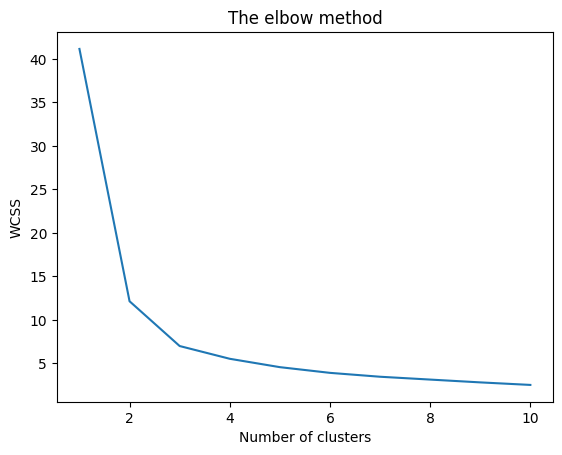

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(normalized_df)

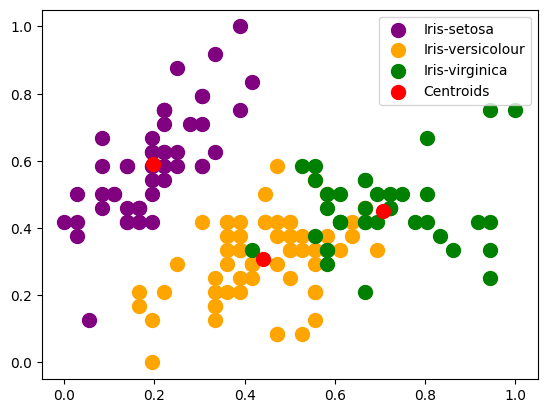

In [ ]:
# Visualizing the clusters
plt.scatter(normalized_df.iloc[y_kmeans == 0, 0], normalized_df.iloc[y_kmeans == 0, 1], s=100, c='purple', label='Iris-setosa')
plt.scatter(normalized_df.iloc[y_kmeans == 1, 0], normalized_df.iloc[y_kmeans == 1, 1], s=100, c='orange', label='Iris-versicolour')
plt.scatter(normalized_df.iloc[y_kmeans == 2, 0], normalized_df.iloc[y_kmeans == 2, 1], s=100, c='green', label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')

plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score


true_labels = iris['Species']

ari = adjusted_rand_score(true_labels, y_kmeans)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.7163421126838476


In [ ]:
##FOR N=4 clusters

In [ ]:
kmeans2 = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans2 = kmeans2.fit_predict(normalized_df)

In [ ]:
print("Adjusted Rand Index:", adjusted_rand_score(true_labels, y_kmeans2))

Adjusted Rand Index: 0.6230929299814632


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


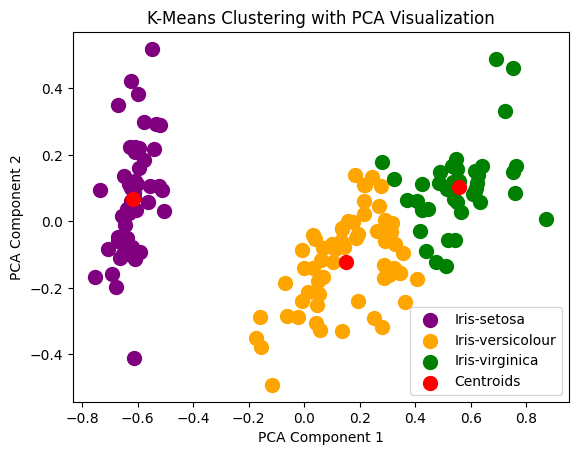

In [ ]:

#using PCA for visualizing the data
pca = PCA(n_components=2)
pca_features = pca.fit_transform(normalized_df)

# Plot clusters after PCA
plt.scatter(pca_features[y_kmeans == 0, 0], pca_features[y_kmeans == 0, 1], s=100, c='purple', label='Iris-setosa')
plt.scatter(pca_features[y_kmeans == 1, 0], pca_features[y_kmeans == 1, 1], s=100, c='orange', label='Iris-versicolour')
plt.scatter(pca_features[y_kmeans == 2, 0], pca_features[y_kmeans == 2, 1], s=100, c='green', label='Iris-virginica')

# Plot centroids after PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=100, c='red', label='Centroids')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with PCA Visualization')
plt.legend()
plt.show()